# baywheels Data Analysis
## by Bijan Fallah

## Preliminary Wrangling

Bike Share for All

Baywheels offers all residents of the Bay Area an affordable, accessible, and fun new transportation option. Low-income residents qualify for a discounted membership. 


> I am interested in the following points: 

- How is the duration usage of the bikes on different locations and times. 
- Which users use bikes more? 
- Time, date, location correlations. 
 

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
from pathlib import Path
import zipfile
import glob
import matplotlib
import datetime
from mpl_toolkits.basemap import Basemap
from matplotlib.gridspec import GridSpec
%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [4]:
# how to download data automatically? 
url="https://s3.amazonaws.com/baywheels-data/"
start_year=2018
end_year=2021

for year in range(start_year, end_year): 
    for mon in range(1,13):
        if (year == 2020) & (mon > 7 ): 
            break
        
        if ( year <= 2019) & (mon < 5) :
            
            if mon < 10 : 
                mon = "0"+str(mon)
                
            my_file = Path("./"+str(year)+str(mon)+"-fordgobike-tripdata.csv.zip")
            if my_file.is_file():
                continue
            else: 
                cmd =  "wget "+url+str(year)+str(mon)+"-fordgobike-tripdata.csv.zip"
                print(cmd)
                os.system(cmd)
        else:
            if mon < 10 : 
                mon = "0"+str(mon)
                
            my_file = Path("./"+str(year)+str(mon)+"-baywheels-tripdata.csv.zip")
            if my_file.is_file():
                continue
            else: 
                cmd =  "wget "+url+str(year)+str(mon)+"-baywheels-tripdata.csv.zip"
                print(cmd)
                os.system(cmd)
            
   

wget https://s3.amazonaws.com/baywheels-data/201805-baywheels-tripdata.csv.zip
wget https://s3.amazonaws.com/baywheels-data/201806-baywheels-tripdata.csv.zip
wget https://s3.amazonaws.com/baywheels-data/201807-baywheels-tripdata.csv.zip
wget https://s3.amazonaws.com/baywheels-data/201808-baywheels-tripdata.csv.zip
wget https://s3.amazonaws.com/baywheels-data/201809-baywheels-tripdata.csv.zip
wget https://s3.amazonaws.com/baywheels-data/201810-baywheels-tripdata.csv.zip
wget https://s3.amazonaws.com/baywheels-data/201811-baywheels-tripdata.csv.zip
wget https://s3.amazonaws.com/baywheels-data/201812-baywheels-tripdata.csv.zip


- I will analyse first a single month ! 



In [5]:
!pwd

/home/bkd/Downloads/flight


In [6]:
# read a sample file: 
zf = zipfile.ZipFile('./201803-fordgobike-tripdata.csv.zip')

data = pd.read_csv(zf.open('201803-fordgobike-tripdata.csv'))


In [7]:
data.sample(10)

duration_sec                start_time                  end_time  \
96111            817  2018-03-06 10:59:32.1060  2018-03-06 11:13:09.8830   
59988            501  2018-03-16 08:23:37.1720  2018-03-16 08:31:58.4070   
12457            341  2018-03-29 08:00:42.1030  2018-03-29 08:06:23.7420   
12636            299  2018-03-29 07:31:07.4090  2018-03-29 07:36:07.2930   
105759           388  2018-03-03 08:21:30.3620  2018-03-03 08:27:59.2680   
56134           2607  2018-03-17 11:52:13.9250  2018-03-17 12:35:40.9600   
44295            415  2018-03-21 08:30:07.2770  2018-03-21 08:37:02.8950   
36088            390  2018-03-23 09:04:28.3480  2018-03-23 09:10:58.5810   
80211            622  2018-03-09 17:32:56.6040  2018-03-09 17:43:19.0040   
59833            345  2018-03-16 08:52:28.2850  2018-03-16 08:58:14.1330   

        start_station_id                                 start_station_name  \
96111                 72                                Page St at Scott St   
59988                194                   Lakeshore Ave at Trestle Glen Rd   
12457                324                Union Square (Powell St at Post St)   
12636                 22                              Howard St at Beale St   
105759                15  San Francisco Ferry Building (Harry Bridges Pl...   
56134                 42      San Francisco City Hall (Polk St at Grove St)   
44295                 67  San Francisco Caltrain Station 2  (Townsend St...   
36088                 44  Civic Center/UN Plaza BART Station (Market St ...   
80211                 44  Civic Center/UN Plaza BART Station (Market St ...   
59833                 67  San Francisco Caltrain Station 2  (Townsend St...   

        start_station_latitude  start_station_longitude  end_station_id  \
96111                37.772406              -122.435650              79   
59988                37.811081              -122.243268             181   
12457                37.788300              -122.408531              47   
12636                37.789756              -122.394643              19   
105759               37.795392              -122.394203               6   
56134                37.778650              -122.418230              55   
44295                37.776639              -122.395526              45   
36088                37.781074              -122.411738              21   
80211                37.781074              -122.411738             121   
59833                37.776639              -122.395526              25   

                                        end_station_name  \
96111                               7th St at Brannan St   
59988                            Grand Ave at Webster St   
12457                              4th St at Harrison St   
12636                               Post St at Kearny St   
105759                     The Embarcadero at Sansome St   
56134                             Webster St at Grove St   
44295                                5th St at Howard St   
36088   Montgomery St BART Station (Market St at 2nd St)   
80211                                 Mission Playground   
59833                                Howard St at 2nd St   

        end_station_latitude  end_station_longitude  bike_id   user_type  \
96111              37.773492            -122.403673     2205  Subscriber   
59988              37.811377            -122.265192      511  Subscriber   
12457              37.780955            -122.399749     3119  Subscriber   
12636              37.788975            -122.403452     2995  Subscriber   
105759             37.804770            -122.403234     1021  Subscriber   
56134              37.777053            -122.429558     1473    Customer   
44295              37.781752            -122.405127     2513  Subscriber   
36088              37.789625            -122.400811       63  Subscriber   
80211              37.759210            -122.421339     2855  Subscriber   
59833              37.787522            -122.397405   

In [8]:
data.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
bike_share_for_all_trip     object
dtype: object

In [9]:
data.isnull().sum(axis = 0)

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
bike_share_for_all_trip    0
dtype: int64

In [10]:
# check if it is removed 
data.sample(10)

duration_sec                start_time                  end_time  \
92078          1397  2018-03-07 08:38:18.9770  2018-03-07 09:01:36.5910   
64836           396  2018-03-14 18:09:32.0510  2018-03-14 18:16:08.5170   
85265           893  2018-03-08 16:48:22.5800  2018-03-08 17:03:16.0680   
87287           275  2018-03-08 08:50:46.2030  2018-03-08 08:55:22.0830   
72518          1576  2018-03-12 11:24:16.9970  2018-03-12 11:50:33.4960   
78059           405  2018-03-10 14:14:15.7250  2018-03-10 14:21:01.1550   
72395           214  2018-03-12 12:25:33.4900  2018-03-12 12:29:07.9690   
59950           567  2018-03-16 08:28:32.6470  2018-03-16 08:37:59.7980   
35885           604  2018-03-23 09:29:13.0710  2018-03-23 09:39:17.1780   
82335          1210  2018-03-09 09:07:20.0210  2018-03-09 09:27:30.1220   

       start_station_id                                 start_station_name  \
92078               122                              19th St at Mission St   
64836                30     San Francisco Caltrain (Townsend St at 4th St)   
85265                 5       Powell St BART Station (Market St at 5th St)   
87287                16                            Steuart St at Market St   
72518               324                Union Square (Powell St at Post St)   
78059               197                        El Embarcadero at Grand Ave   
72395                10                         Washington St at Kearny St   
59950                66                              3rd St at Townsend St   
35885               120                               Mission Dolores Park   
82335                15  San Francisco Ferry Building (Harry Bridges Pl...   

       start_station_latitude  start_station_longitude  end_station_id  \
92078               37.760299              -122.418892              14   
64836               37.776598              -122.395282             342   
85265               37.783899              -122.408445              31   
87287               37.794130              -122.394430              28   
72518               37.788300              -122.408531              74   
78059               37.808848              -122.249680             200   
72395               37.795393              -122.404770              11   
59950               37.778742              -122.392741              78   
35885               37.761420              -122.426435             100   
82335               37.795392              -122.394203             101   

                                        end_station_name  \
92078                              Clay St at Battery St   
64836  Colin P Kelly Jr St at Townsend St (Temporary ...   
85265                         Raymond Kimbell Playground   
87287                       The Embarcadero at Bryant St   
72518                              Laguna St at Hayes St   
78059                               2nd Ave at E 18th St   
72395                             Davis St at Jackson St   
59950                                Folsom St at 9th St   
35885                               Bryant St at 15th St   
82335                           San Bruno Ave at 16th St   

       end_station_latitude  end_station_longitude  bike_id   user_type  \
92078             37.795001            -122.399970       93  Subscriber   
64836             37.781383            -122.389841     2588  Subscriber   
85265             37.783813            -122.434559     3443  Subscriber   
87287             37.787168            -122.388098     3679  Subscriber   
72518             37.776435            -122.426244     3335    Customer   
78059             37.800214            -122.253810      663  Subscriber   
72395             37.797280            -122.398436     3395  Subscriber   
59950             37.773717            -122.411647     2205  Subscriber   
35885             37.767100            -122.410662     3055  Subscriber   
82335             37.766008            -122.405677       88    Customer   

      bike_share_for

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

Text(0.5, 1.0, 'A simple box plot to see the distributions')

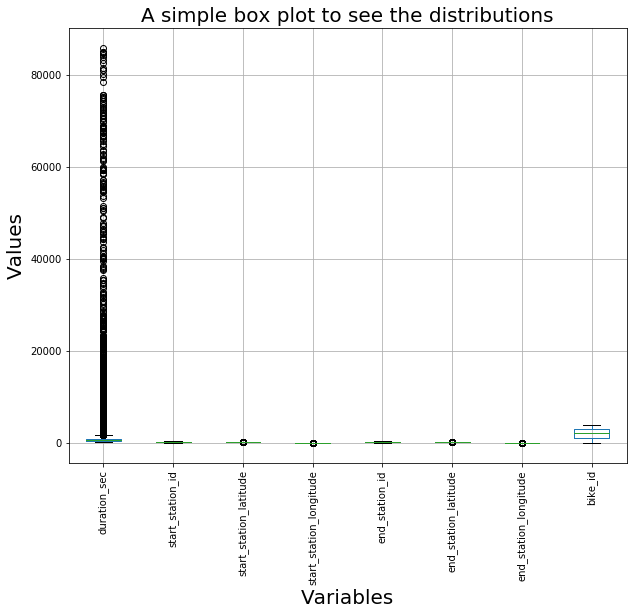

In [11]:
# A simple box plot to see the distributions: 

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
ax = data.boxplot()
plt.xticks( rotation='vertical')
plt.xlabel('Variables', fontsize=20)
plt.ylabel('Values', fontsize=20)
plt.title('A simple box plot to see the distributions', fontsize=20)

- why so much large outliers for duration_sec? 

Text(0, 0.5, 'Density')

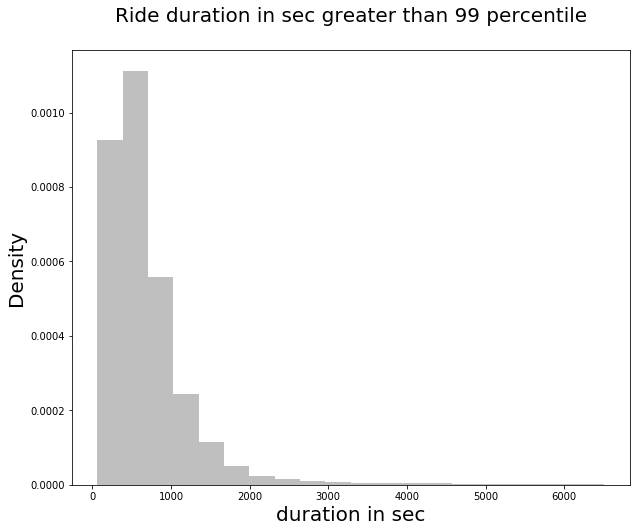

In [12]:
perc_95 = np.percentile(data.duration_sec,99)
n, bins, patches = plt.hist(data.duration_sec[data.duration_sec<perc_95], 20,
                            color="Grey" ,density=1, alpha=.5); 

plt.title("Ride duration in sec greater than 99 percentile\n ", fontsize=20)
plt.xlabel("duration in sec", fontsize=20)
plt.ylabel("Density", fontsize=20)

- Now I check what are these huge numbers in durations ? 


In [13]:
max_duration = data.duration_sec[data.duration_sec>perc_95].max()
#print(data[data.duration_sec == max_duration ])
print()
print("Duration in hours ----------------: "+
      str(data[data.duration_sec == max_duration].duration_sec.values[0]/3600.))
data[data.duration_sec == max_duration ]


Duration in hours ----------------: 23.845555555555556


duration_sec                start_time                  end_time  \
3         85844  2018-03-31 11:28:07.6580  2018-04-01 11:18:52.6130   

   start_station_id      start_station_name  start_station_latitude  \
3               186  Lakeside Dr at 14th St               37.801319   

   start_station_longitude  end_station_id         end_station_name  \
3              -122.262642             340  Harmon St at Adeline St   

   end_station_latitude  end_station_longitude  bike_id user_type  \
3             37.849735            -122.270582     3722  Customer   

  bike_share_for_all_trip  
3                      No

- It seems to be okay, the guy rented the bike for 23.92 hours ! The question is if he(seh rides for the whole period or forgot to lock out the bicycle! nad there is no way to find it out! 



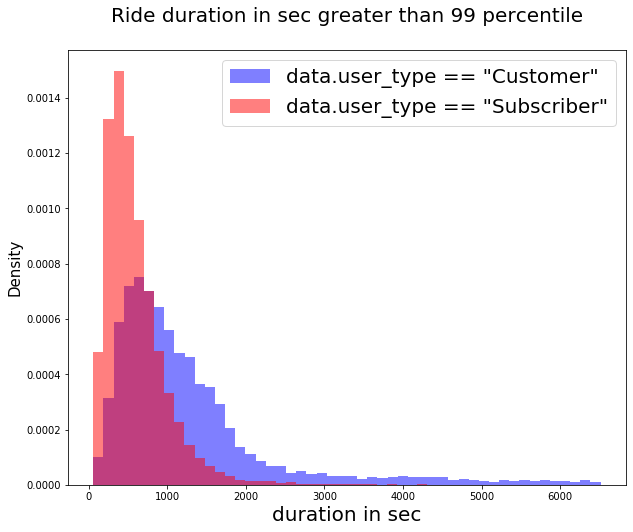

In [14]:
# plot the histogram again for  User type  
n, bins, patches = plt.hist(data.duration_sec[(data.user_type == "Customer") & (data.duration_sec<perc_95)],
                            50, label='data.user_type == "Customer"',
                            color="Blue" ,density=1, alpha=.5); 
n, bins, patches = plt.hist(data.duration_sec[(data.user_type == "Subscriber") & (data.duration_sec<perc_95)],
                            50,label='data.user_type == "Subscriber"',
                            color="red" ,density=1, alpha=.5); 
plt.title("Ride duration in sec greater than 99 percentile\n ", fontsize=20)
plt.xlabel("duration in sec", fontsize=20)
plt.ylabel("Density", fontsize=15)
plt.legend(fontsize=20)

In [15]:
set(data.user_type)

{'Customer', 'Subscriber'}

 **Isues with the data tidiness**
- the date values should be splitted into year, month, day, hour, minute and sec. 
- I also need the day of the week for both start and end times. 
- the columns start_time and end_time change to started_at and ended_at sinc 202004!
- the file names also change from YYYYMM-fordgobike-tripdata.csv.zip  to YYYYMM-baywheels-tripdata.csv.zip
- duration_Sec is nan for some enteries! after 202004! 
- I also drop the columns with many nans like : start_lng, start_lat , ride_id, rental_access_method, rideable_type, member_casual, ...



**Merging the whole dataset** 
> Now I will try to merge the whole dataset together to make life easy for myself and store it on the disk : 

In [ ]:
data_total =[]
for i in sorted(glob.glob("./*csv.zip")):
    print(i)
    zf = zipfile.ZipFile(i)
    data = pd.read_csv(zf.open(i[2:-4]), dtype='unicode')
    # Do not need the miliseconds! 
    

    print('              ',i,int(i[2:6]), int(i[7:8]))
    if (int(i[2:6]) == 2020 ) & (int(i[7:8]) > 3):
        data['started_at'] = [d[0:19] for d in data['started_at']]
        data['ended_at'] = [d[0:19] for d in data['ended_at']]
        
        data['start_new_date'] = [datetime.datetime.strptime(d,
                                                             "%Y-%m-%d  %H:%M:%S").date() for d in data['started_at']]
        data['end_new_date'] = [datetime.datetime.strptime(d,
                                                             "%Y-%m-%d  %H:%M:%S").date() for d in data['ended_at']]
        data['start_new_time'] = [datetime.datetime.strptime(d,
                                                             "%Y-%m-%d  %H:%M:%S").time() for d in data['started_at']]
        data['end_new_time'] = [datetime.datetime.strptime(d,
                                                             "%Y-%m-%d  %H:%M:%S").time() for d in data['ended_at']]
        data['start_dow']    = [datetime.datetime.strptime(d,
                                                             "%Y-%m-%d  %H:%M:%S").weekday() for d in data['started_at']]
        data['end_dow']    = [datetime.datetime.strptime(d,
                                                             "%Y-%m-%d  %H:%M:%S").weekday() for d in data['ended_at']]        
        data['duration_sec'] = [ (datetime.datetime.strptime(data['ended_at'].iloc[i],
                                                             "%Y-%m-%d  %H:%M:%S" )- datetime.datetime.strptime(data['started_at'].iloc[i],
                                                                                                                "%Y-%m-%d  %H:%M:%S")).total_seconds() for i in range(len(data['started_at']))]        
        data['end_station_latitude'] = data['end_lat']
        data['end_station_longitude'] = data['end_lng']
        data['start_station_longitude'] = data['start_lng']
        data['start_station_latitude'] = data['start_lat']
        data.drop(['start_lat','end_lat','started_at','ended_at', 'end_lng', 'start_lng'], axis=1, inplace=True)
    else:
        data['start_time'] = [d[0:19] for d in data['start_time']]
        data['end_time'] = [d[0:19] for d in data['end_time']]
        data['start_new_date'] = [datetime.datetime.strptime(d,
                                                             "%Y-%m-%d  %H:%M:%S").date() for d in data['start_time']]
        data['end_new_date'] = [datetime.datetime.strptime(d,
                                                             "%Y-%m-%d  %H:%M:%S").date() for d in data['end_time']]
        data['start_new_time'] = [datetime.datetime.strptime(d,
                                                             "%Y-%m-%d  %H:%M:%S").time() for d in data['start_time']]
        data['end_new_time'] = [datetime.datetime.strptime(d,
                                                             "%Y-%m-%d  %H:%M:%S").time() for d in data['end_time']]
        data['start_dow']    = [datetime.datetime.strptime(d,
                                                             "%Y-%m-%d  %H:%M:%S").weekday() for d in data['start_time']]
        data['end_dow']    = [datetime.datetime.strptime(d,
                                                             "%Y-%m-%d  %H:%M:%S").weekday() for d in data['end_time']]
        data.drop(['start_time','end_time'], axis=1, inplace=True)
        
        
    data_total.append(data)

appended_data = pd.concat(data_total)        
    

In [ ]:
appended_data.dtypes

In [ ]:
# Now check if it worked: 
appended_data.sample(10)

In [ ]:
# save the dataframe: 
appended_data.to_pickle("./data_final.pkl")

In [17]:
# unpickle the data : 
df = pd.read_pickle("./data_final.pkl")

 > **checking the merged data** 
 > Now I check the merged data: 

In [ ]:
# first drop the changed columns : 
#df.drop(['start_time', 'started_at', 'end_time', 'ended_at'], axis=1, inplace=True)

In [18]:
df.dtypes

bike_id                    object
bike_share_for_all_trip    object
duration_sec               object
end_dow                     int64
end_lng                    object
end_new_date               object
end_new_time               object
end_station_id             object
end_station_latitude       object
end_station_longitude      object
end_station_name           object
is_equity                  object
member_casual              object
rental_access_method       object
ride_id                    object
rideable_type              object
start_dow                   int64
start_lng                  object
start_new_date             object
start_new_time             object
start_station_id           object
start_station_latitude     object
start_station_longitude    object
start_station_name         object
user_type                  object
dtype: object

In [4]:
df.shape

(5811356, 25)

In [19]:
df.isnull().sum(axis = 0)

bike_id                     535645
bike_share_for_all_trip    1683911
duration_sec                     0
end_dow                          0
end_lng                    5276549
end_new_date                     0
end_new_time                     0
end_station_id              781905
end_station_latitude           838
end_station_longitude          838
end_station_name            780079
is_equity                  5673105
member_casual              5275711
rental_access_method       5072660
ride_id                    5275711
rideable_type              5275711
start_dow                        0
start_lng                  5275711
start_new_date                   0
start_new_time                   0
start_station_id            771894
start_station_latitude           0
start_station_longitude          0
start_station_name          770060
user_type                   535645
dtype: int64

>  I do not need the bike_id, ride_id, start_lng , end_lng , 

In [20]:
df.drop(['bike_id','ride_id', 'end_lng', 'start_lng'], axis=1, inplace=True)


In [6]:
df.sample(10)

bike_share_for_all_trip duration_sec  end_dow end_new_date  \
203587                     NaN          604        4   2020-02-07   
195232                      No         1153        6   2019-10-06   
202799                      No          535        4   2019-03-08   
14996                       No          248        2   2018-03-28   
44105                      NaN          976        6   2020-01-19   
128129                     Yes          515        2   2018-05-09   
180269                      No          130        2   2018-10-03   
110294                      No          840        0   2019-11-11   
50250                      NaN        14767        5   2020-07-18   
206805                      No          178        1   2019-09-03   

       end_new_time end_station_id end_station_latitude end_station_longitude  \
203587     17:17:12            NaN             37.77871       -122.3928451667   
195232     19:01:24            356        37.7691881781         -122.42228508   
202799     13:03:36            156           37.8384435          -122.2886647   
14996      17:00:24            200         37.800213567       -122.2538101673   
44105      08:26:21            462        37.8042232774       -122.4016427994   
128129     18:02:23            305            37.342725           -121.895617   
180269     19:04:19            355        37.7553671322       -122.3887950182   
110294     20:42:25            106           37.7632417          -122.4306746   
50250      18:27:49            NaN                 37.8               -122.45   
206805     14:54:48             72            37.772406          -122.4356498   

                   end_station_name is_equity     ...      \
203587                          NaN       NaN     ...       
195232  Valencia St at Clinton Park       NaN     ...       
202799    Stanford Ave at Hollis St       NaN     ...       
14996          2nd Ave at E 18th St       NaN     ...       
44105    Cruise Terminal at Pier 27       NaN     ...       
128129                  Ryland Park       NaN     ...       
180269      23rd St at Tennessee St       NaN     ...       
110294        Sanchez St at 17th St       NaN     ...       
50250                           NaN       NaN     ...       
206805          Page St at Scott St       NaN     ...       

       rental_access_method  rideable_type start_dow  start_new_date  \
203587                  app            NaN         4      2020-02-07   
195232                  NaN            NaN         6      2019-10-06   
202799                  NaN            NaN         4      2019-03-08   
14996                   NaN            NaN         2      2018-03-28   
44105                   NaN            NaN         6      2020-01-19   
128129                  NaN            NaN         2      2018-05-09   
180269                  NaN            NaN         2      2018-10-03   
110294                  NaN            NaN         0      2019-11-11   
50250                   NaN  electric_bike         5      2020-07-18   
206805                  NaN            NaN         1      2019-09-03   

       start_new_time start_station_id start_station_latitude  \
203587       17:07:07              NaN             37.7659125   
195232       18:42:11               29          37.7824046019   
202799       12:54:40              176          37.8284099731   
14996        16:56:16              197             37.8088479   
44105        08:10:05               66          37.7787416115   
128129       17:53:47              310              37.335885   
180269       19:02:08              130          37.7577184216   
110294       20:28:24              439          37.7843718111   
50250        14:21:42              NaN                  37.78   
206805       14:51:50               73             37.7717933   

       start_station_longitude             start_station_name   user_type  
203587         -122.4018328333                            NaN  Subscriber  
195232         -122.43

In [7]:
df.columns

Index(['bike_share_for_all_trip', 'duration_sec', 'end_dow', 'end_new_date',
       'end_new_time', 'end_station_id', 'end_station_latitude',
       'end_station_longitude', 'end_station_name', 'is_equity',
       'member_casual', 'rental_access_method', 'rideable_type', 'start_dow',
       'start_new_date', 'start_new_time', 'start_station_id',
       'start_station_latitude', 'start_station_longitude',
       'start_station_name', 'user_type'],
      dtype='object')

### Which variables to hold : 

> I decide for the following variables for my analysis: 

- duration_sec , I can do some analysis showing where and where the duration is increasing. this is what brings money for the company! 

- start and end day of week 

- start and end longitude and latitudes 

- start and end time and date 


In [21]:
# lets select the abovementioned variables: 
variables_to_keep = ['duration_sec', 'start_dow','end_dow','start_new_date', 'end_new_date',
                     'start_new_time','end_new_time',
                     'start_station_latitude', 'end_station_latitude','start_station_longitude', 
                    'end_station_longitude']

In [22]:
df_final = df[variables_to_keep]

In [10]:
df_final.head()

duration_sec  start_dow  end_dow start_new_date end_new_date start_new_time  \
0        75284          2        3     2018-01-31   2018-02-01       22:52:35   
1        85422          2        3     2018-01-31   2018-02-01       16:13:34   
2        71576          2        3     2018-01-31   2018-02-01       14:23:55   
3        61076          2        3     2018-01-31   2018-02-01       14:53:23   
4        39966          2        3     2018-01-31   2018-02-01       19:52:24   

  end_new_time start_station_latitude end_station_latitude  \
0     19:47:19             37.7614205        37.7835208353   
1     15:57:17              37.795392            37.795392   
2     10:16:52          37.3487586867           37.3259984   
3     07:51:20          37.7737932061        37.7809545996   
4     06:58:31          37.7764348192            37.788975   

  start_station_longitude end_station_longitude  
0            -122.4264353       -122.4311578274  
1             -122.394203           -122.394203  
2         -121.8947978318            -121.87712  
3         -122.4212390184       -122.3997491598  
4         -122.4262440205           -122.403452

In [11]:
df_final.tail()

duration_sec  start_dow  end_dow start_new_date end_new_date  \
154962          744          6        6     2020-07-12   2020-07-12   
154963         2584          6        6     2020-07-12   2020-07-12   
154964         3178          6        6     2020-07-12   2020-07-12   
154965         4546          6        6     2020-07-12   2020-07-12   
154966          685          6        6     2020-07-12   2020-07-12   

       start_new_time end_new_time start_station_latitude  \
154962       17:32:32     17:44:56              37.792251   
154963       18:20:15     19:03:19              37.795393   
154964       19:04:52     19:57:50              37.797628   
154965       16:13:57     17:29:43              37.794497   
154966       15:47:48     15:59:13              37.804648   

       end_station_latitude start_station_longitude end_station_longitude  
154962            37.795393             -122.397086            -122.40477  
154963            37.797628              -122.40477           -122.423535  
154964            37.795393             -122.423535            -122.40477  
154965            37.792251             -122.394838           -122.397086  
154966            37.794497             -122.402087           -122.394838

In [12]:
df_final.isnull().sum(axis = 0)

duration_sec                 0
start_dow                    0
end_dow                      0
start_new_date               0
end_new_date                 0
start_new_time               0
end_new_time                 0
start_station_latitude       0
end_station_latitude       838
start_station_longitude      0
end_station_longitude      838
dtype: int64

> there are still some nans in end_station_lon and lat. I decide to drop these: 


In [23]:
# drop the nans : 
df_final.dropna(inplace=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
# check it out : 
df_final.isnull().sum(axis = 0)

duration_sec               0
start_dow                  0
end_dow                    0
start_new_date             0
end_new_date               0
start_new_time             0
end_new_time               0
start_station_latitude     0
end_station_latitude       0
start_station_longitude    0
end_station_longitude      0
dtype: int64

- Now there are some issues like almost all the variables are object now and have to be corrected! 

In [15]:
df_final.dtypes

duration_sec               object
start_dow                   int64
end_dow                     int64
start_new_date             object
end_new_date               object
start_new_time             object
end_new_time               object
start_station_latitude     object
end_station_latitude       object
start_station_longitude    object
end_station_longitude      object
dtype: object

In [24]:

to_be_float = ["duration_sec","end_dow","start_dow","start_station_latitude","start_station_longitude",
              "end_station_latitude","end_station_longitude"]

df_final[to_be_float] = df_final[to_be_float].astype(str).astype(float)


/usr/lib/python3/dist-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [17]:
# check the result: 
df_final.dtypes

duration_sec               float64
start_dow                  float64
end_dow                    float64
start_new_date              object
end_new_date                object
start_new_time              object
end_new_time                object
start_station_latitude     float64
end_station_latitude       float64
start_station_longitude    float64
end_station_longitude      float64
dtype: object

In [18]:
df_final.describe()

duration_sec     start_dow       end_dow  start_station_latitude  \
count  5.810518e+06  5.810518e+06  5.810518e+06            5.810518e+06   
mean   8.978117e+02  2.699828e+00  2.700273e+00            3.775928e+01   
std    6.874430e+03  1.877292e+00  1.877791e+00            1.482241e-01   
min   -3.762000e+03  0.000000e+00  0.000000e+00            0.000000e+00   
25%    3.620000e+02  1.000000e+00  1.000000e+00            3.776834e+01   
50%    5.830000e+02  3.000000e+00  3.000000e+00            3.777967e+01   
75%    9.250000e+02  4.000000e+00  4.000000e+00            3.779500e+01   
max    3.283732e+06  6.000000e+00  6.000000e+00            4.551000e+01   

       end_station_latitude  start_station_longitude  end_station_longitude  
count          5.810518e+06             5.810518e+06           5.810518e+06  
mean           3.775889e+01            -1.223505e+02          -1.223481e+02  
std            2.045244e-01             3.433957e-01           5.790407e-01  
min            0.000000e+00            -1.225143e+02          -1.225758e+02  
25%            3.776919e+01            -1.224160e+02          -1.224144e+02  
50%            3.778015e+01            -1.223996e+02          -1.223990e+02  
75%            3.779539e+01            -1.223881e+02          -1.223881e+02  
max            4.551000e+01             0.000000e+00           0.000000e+00

## Plotting the Univariate

Text(0.5, 1.0, 'A simple box plot to see the distributions')

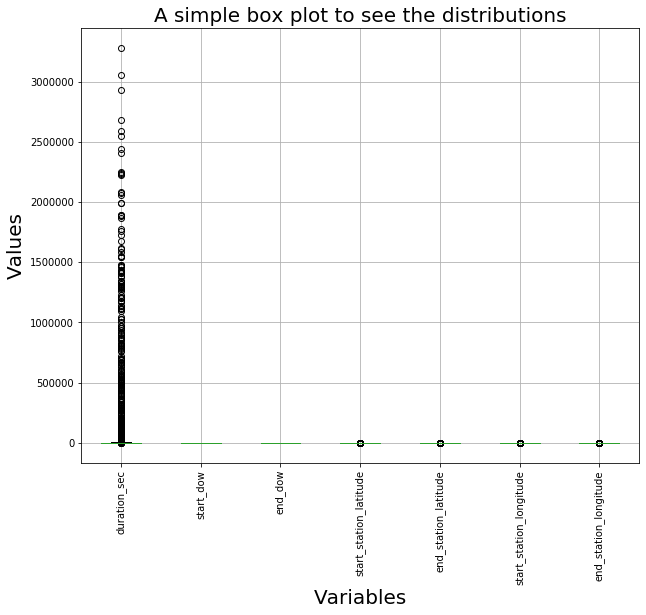

In [19]:

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
ax = df_final.boxplot()
plt.xticks( rotation='vertical')
plt.xlabel('Variables', fontsize=20)
plt.ylabel('Values', fontsize=20)
plt.title('A simple box plot to see the distributions', fontsize=20)

> As it could be seen the duration in sec is showinh unusual values (ouliers! )
> let's see what are these? 

In [20]:
df_99p = df_final[df_final.duration_sec > np.percentile(df_final.duration_sec,99)] # greater than 99 ßercentile


In [21]:
df_99p.start_new_time.count()

58103

> I decide to drop extreme values, greater than 99 percentile: 


In [25]:
df_final = df_final[df_final.duration_sec < np.percentile(df_final.duration_sec,99)] # smaller than 99 ßercentile

Text(0.5, 1.0, 'A simple box plot to see the distributions')

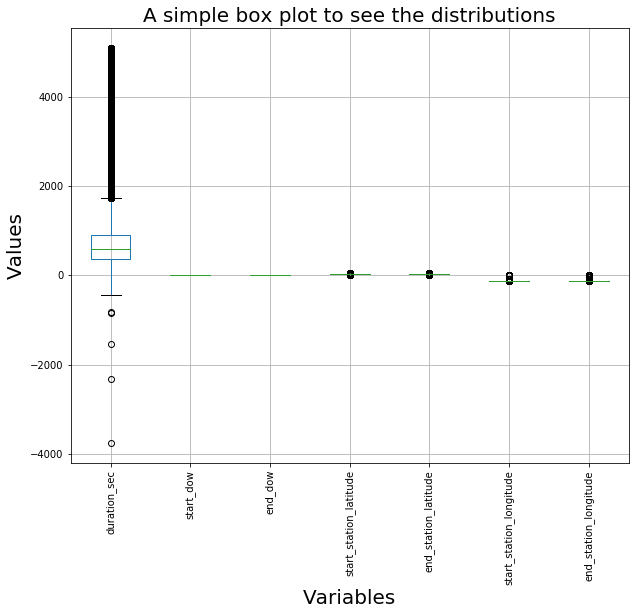

In [23]:
# plot again : 
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
ax = df_final.boxplot()
plt.xticks( rotation='vertical')
plt.xlabel('Variables', fontsize=20)
plt.ylabel('Values', fontsize=20)
plt.title('A simple box plot to see the distributions', fontsize=20)

> the question is what are the negative values in duration sec ? 

In [26]:
 df_minus_duration = df_final[df_final.duration_sec <0]

In [27]:
df_minus_duration.shape

(370, 11)

> I will drop these as well! 

In [28]:
df_final = df_final[df_final.duration_sec > 0]

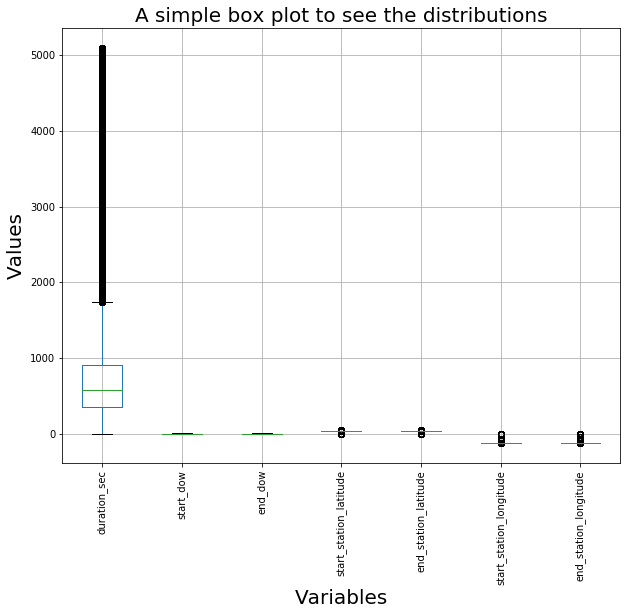

In [27]:
# plot again: 
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
ax = df_final.boxplot()
plt.xticks( rotation='vertical')
plt.xlabel('Variables', fontsize=20)
plt.ylabel('Values', fontsize=20)
plt.title('A simple box plot to see the distributions', fontsize=20);

**next steps & Ideas** 
> - The idea is to find patterns like diurnal cycle, monthly cycles and trends like after COVID19 incidence. 
> - Or relation to the long and latidue 


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Text(0.5, 0, 'Number of rides')

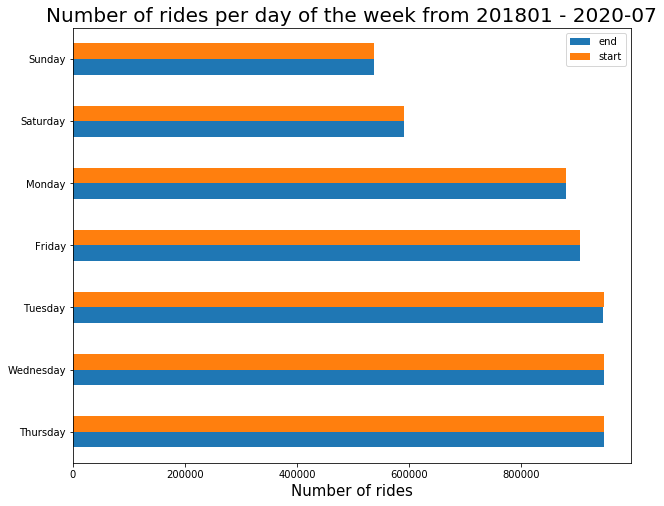

In [29]:
# plot number of rides falling in day of the week : 
# for start day : 
df_start_dow = df_final.start_dow.value_counts()
# for end day: 
df_end_dow = df_final.end_dow.value_counts()
#index = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
index = ["Thursday","Wednesday", "Tuesday","Friday","Monday","Saturday","Sunday"]
df = pd.DataFrame({'start': df_start_dow.values,
                    'end': df_end_dow.values}, index=df_start_dow.index)
ax = df.plot.barh()
ax.set_yticklabels(index)
plt.title('Number of rides per day of the week from 201801 - 2020-07', fontsize=20)
plt.xlabel('Number of rides',fontsize=15)

> there is a weekly cycle, during weekend people will rent less and they rent the bike for going to work ! 

In [30]:
# split time : 

df_final["start_hour"] = [h.hour for h in df_final.start_new_time]
df_final["start_minute"] = [h.minute for h in df_final.start_new_time]
df_final["start_second"] = [h.second for h in df_final.start_new_time]

df_final["end_hour"] = [h.hour for h in df_final.end_new_time]
df_final["end_minute"] = [h.minute for h in df_final.end_new_time]
df_final["end_second"] = [h.second for h in df_final.end_new_time]

In [31]:
df_final.head()

duration_sec  start_dow  end_dow start_new_date end_new_date  \
6          453.0        2.0      3.0     2018-01-31   2018-02-01   
7          180.0        2.0      2.0     2018-01-31   2018-01-31   
8          996.0        2.0      2.0     2018-01-31   2018-01-31   
9          825.0        2.0      2.0     2018-01-31   2018-01-31   
10        1316.0        2.0      2.0     2018-01-31   2018-01-31   

   start_new_time end_new_time  start_station_latitude  end_station_latitude  \
6        23:53:53     00:01:26               37.763708             37.752428   
7        23:52:09     23:55:10               37.775880             37.770407   
8        23:34:56     23:51:32               37.752428             37.785881   
9        23:34:14     23:47:59               37.342725             37.333955   
10       23:24:00     23:45:56               37.765052             37.785881   

    start_station_longitude  end_station_longitude  start_hour  start_minute  \
6               -122.415204            -122.420628          23            53   
7               -122.393170            -122.391198          23            52   
8               -122.420628            -122.408915          23            34   
9               -121.895617            -121.877349          23            34   
10              -122.421866            -122.408915          23            24   

    start_second  end_hour  end_minute  end_second  
6             53         0           1          26  
7              9        23          55          10  
8             56        23          51          32  
9             14        23          47          59  
10             0        23          45          56

Text(0, 0.5, 'Number of rides')

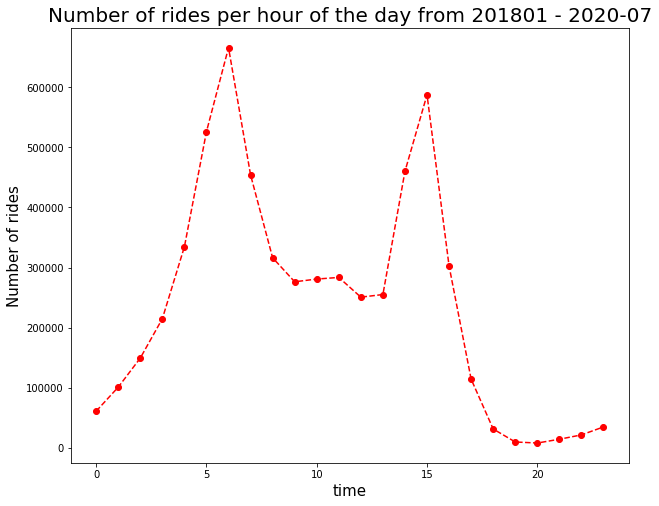

In [32]:
# plot number of rides falling in hour of the day : 
# for start time : 
df_start_hod = df_final.start_hour.value_counts()

ax = plt.plot(df_start_hod.sort_index(ascending=False).values,'r--o')

plt.title('Number of rides per hour of the day from 201801 - 2020-07', fontsize=20)
plt.xlabel('time',fontsize=15)
plt.ylabel('Number of rides',fontsize=15)


> This confirms my hypothesis that people use bikes for going to work and comming back home! See the peaks around 6 and 15 !!!

In [33]:
# split month  : 

df_final["start_year"] = [h.year for h in df_final.start_new_date]
df_final["start_month"] = [h.month for h in df_final.start_new_date]


df_final["end_year"] = [h.year for h in df_final.end_new_date]
df_final["end_month"] = [h.month for h in df_final.end_new_date]


In [34]:
df_final.head()

duration_sec  start_dow  end_dow start_new_date end_new_date  \
6          453.0        2.0      3.0     2018-01-31   2018-02-01   
7          180.0        2.0      2.0     2018-01-31   2018-01-31   
8          996.0        2.0      2.0     2018-01-31   2018-01-31   
9          825.0        2.0      2.0     2018-01-31   2018-01-31   
10        1316.0        2.0      2.0     2018-01-31   2018-01-31   

   start_new_time end_new_time  start_station_latitude  end_station_latitude  \
6        23:53:53     00:01:26               37.763708             37.752428   
7        23:52:09     23:55:10               37.775880             37.770407   
8        23:34:56     23:51:32               37.752428             37.785881   
9        23:34:14     23:47:59               37.342725             37.333955   
10       23:24:00     23:45:56               37.765052             37.785881   

    start_station_longitude    ...      start_hour  start_minute  \
6               -122.415204    ...              23            53   
7               -122.393170    ...              23            52   
8               -122.420628    ...              23            34   
9               -121.895617    ...              23            34   
10              -122.421866    ...              23            24   

    start_second  end_hour  end_minute  end_second  start_year  start_month  \
6             53         0           1          26        2018            1   
7              9        23          55          10        2018            1   
8             56        23          51          32        2018            1   
9             14        23          47          59        2018            1   
10             0        23          45          56        2018            1   

    end_year  end_month  
6       2018          2  
7       2018          1  
8       2018          1  
9       2018          1  
10      2018          1  

[5 rows x 21 columns]

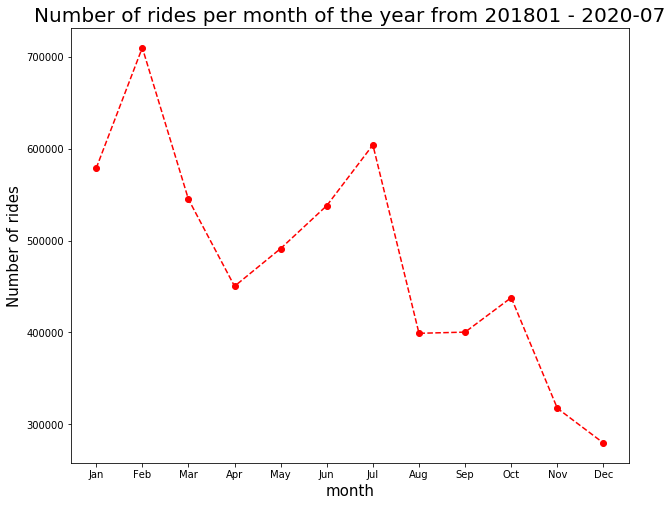

In [35]:
# plot number of rides falling in month of the year: 
# for start time : 
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
fig, ax = plt.subplots()
df_start_moy = df_final.start_month.value_counts()

plt.plot(df_start_moy.sort_index(),'r--o')

plt.title('Number of rides per month of the year from 201801 - 2020-07', fontsize=20)
plt.xlabel('month',fontsize=15)
plt.ylabel('Number of rides',fontsize=15)
index =  ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.set_xticks(range(1,13))
ax.set_xticklabels(index);

Text(0.5, 1.0, 'Meidan of ride duration per month (sec)')

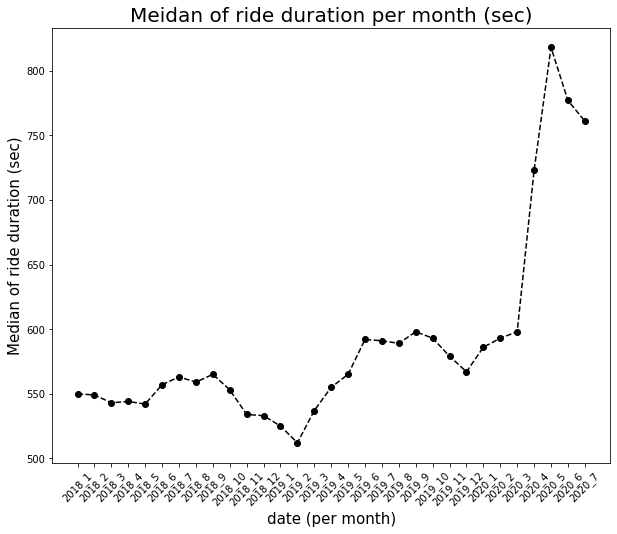

In [36]:
mon = 0
index = []
val = np.zeros(31)
for year in range(2018,2021):
    for month in range(1,13): 
        if (year == 2020) & (month> 7):
            break 
        
        val[mon]=df_final[(df_final.start_month==month) & (df_final.start_year==year)].duration_sec.median()
        index.append(str(year)+"_"+str(month))
        mon += 1
fig, ax = plt.subplots()
plt.plot(range(31),val,'k--o'); 
ax.set_xticks(range(31))
ax.set_xticklabels(index, rotation = 45);
plt.xlabel("date (per month)",fontsize=15)
plt.ylabel("Median of ride duration (sec)", fontsize=15)
plt.title("Meidan of ride duration per month (sec)", fontsize=20)

#### A very interestiing point 
- the COVID-19 pandemie is forcing people to use more bikes!!!!! 

> now time to dig more into details: 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

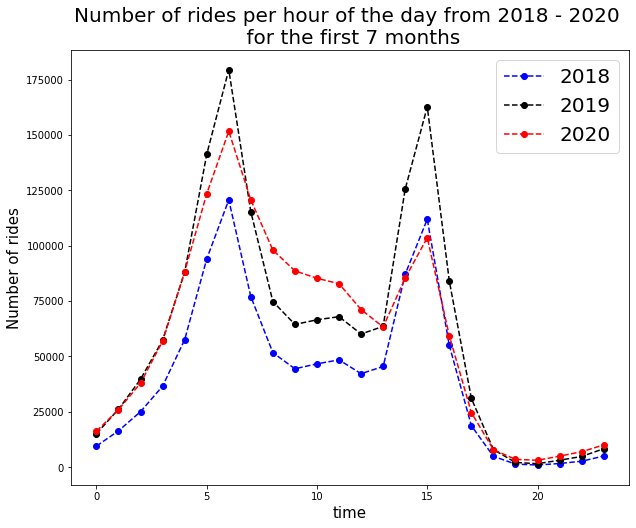

In [37]:
# plot number of rides falling in hour of the day : 
# for start time : 
df_start_hod_2018 = df_final[(df_final.start_year==2018) & (df_final.start_month<8)].start_hour.value_counts()
df_start_hod_2019 = df_final[(df_final.start_year==2019) & (df_final.start_month<8)].start_hour.value_counts()
df_start_hod_2020 = df_final[(df_final.start_year==2020) & (df_final.start_month<8)].start_hour.value_counts()

plt.plot(df_start_hod_2018.sort_index(ascending=False).values,'b--o',label="2018")
plt.plot(df_start_hod_2019.sort_index(ascending=False).values,'k--o',label="2019")
plt.plot(df_start_hod_2020.sort_index(ascending=False).values,'r--o',label="2020")

plt.title('Number of rides per hour of the day from 2018 - 2020 \n for the first 7 months', fontsize=20)
plt.xlabel('time',fontsize=15)
plt.ylabel('Number of rides',fontsize=15)
plt.legend(fontsize=20)

**interesting** that 2020's peaks are less than 2019! people losing their jobs? !!! less tourism? 

## Now plotting maps : 


**Start points' duration sec:**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


http://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/export?bbox=-122.53000000000002,37.68000000000001,-122.35,37.86&bboxSR=4326&imageSR=4326&size=1500,1499&dpi=96&format=png32&transparent=true&f=image


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


http://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/export?bbox=-122.35,37.75,-122.17,37.91&bboxSR=4326&imageSR=4326&size=1500,1333&dpi=96&format=png32&transparent=true&f=image


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:66: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


http://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/export?bbox=-122.0,37.25,-121.75000000000001,37.44&bboxSR=4326&imageSR=4326&size=1500,1139&dpi=96&format=png32&transparent=true&f=image


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


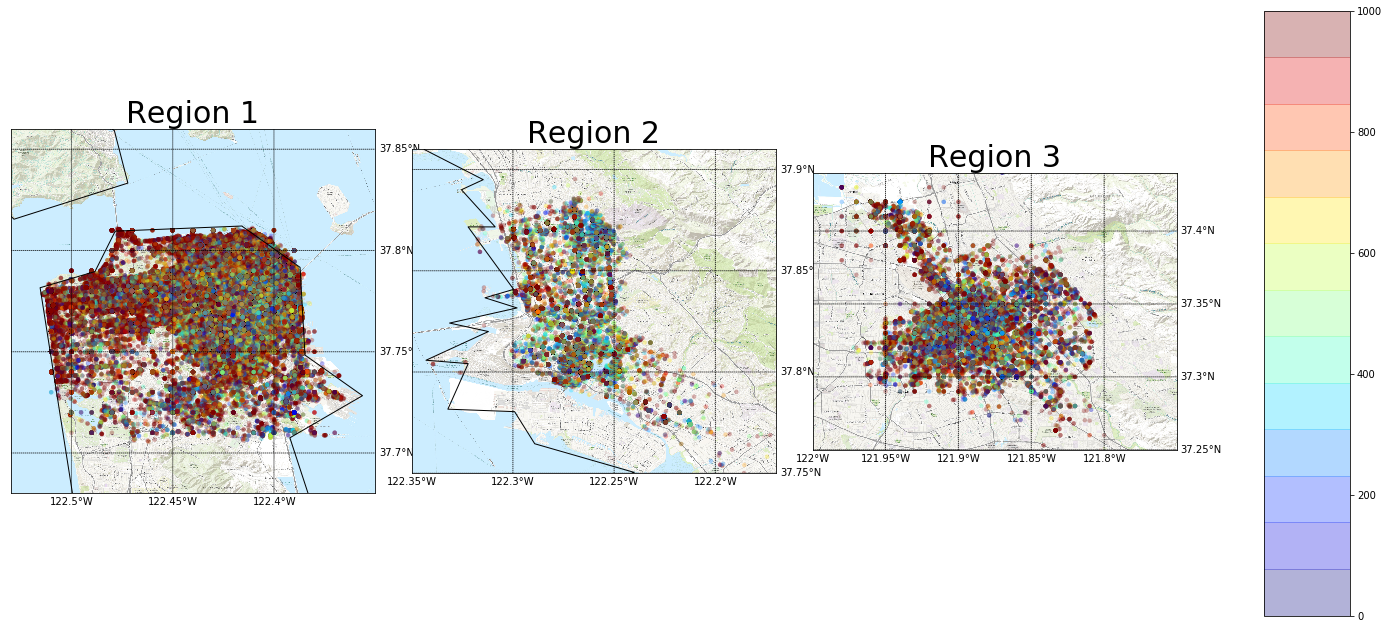

In [145]:
N= df_final.shape[0]
#N=500000
#http://qingkaikong.blogspot.com/2016/06/nice-python-basemap-background.html
my_dpi = 200
map = Basemap(llcrnrlon=-122.53, llcrnrlat=37.68, 
              urcrnrlon=-122.35, urcrnrlat=37.86,resolution='i')

fig = plt.figure(figsize=(24,12))
gs = GridSpec(nrows=1, ncols=3)
gs.update(wspace=0.1, hspace=0.3)
############################################################################  1

ax0 = fig.add_subplot(gs[0, 0])
map.drawcountries(linewidth=0.5, linestyle='solid', color='black', antialiased=1, ax=None, zorder=1)
map.drawcoastlines()
map.shadedrelief()
#map.etopo()
cmap = plt.cm.get_cmap("jet", 13)
map.arcgisimage(service='World_Topo_Map', xpixels = 1500, verbose= True)

lon = df_final.iloc[:N].start_station_longitude
lat = df_final.iloc[:N].start_station_latitude

xpt,ypt = map(lon,lat)
value = df_final.iloc[:N].duration_sec
cs = plt.scatter(xpt,ypt,edgecolors='none', vmin=0, vmax=1000,cmap=cmap,s=20,
                 c= value, alpha=.3)

parallels = np.arange(0.,81,.05)

map.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,.05)
map.drawmeridians(meridians,labels=[True,False,False,True])
plt.title("Region 1", fontsize=30)
plt.tight_layout()
############################################################################## 2
map = Basemap(llcrnrlon=-122.35, llcrnrlat=37.75, 
              urcrnrlon=-122.17,  urcrnrlat=37.91,resolution='i')
ax0 = fig.add_subplot(gs[0, 1])
map.drawcountries(linewidth=0.5, linestyle='solid', color='black', antialiased=1, ax=None, zorder=1)
map.drawcoastlines()
map.shadedrelief()
#map.etopo()
cmap = plt.cm.get_cmap("jet", 13)
map.arcgisimage(service='World_Topo_Map', xpixels = 1500, verbose= True)


value = df_final.iloc[:N].duration_sec
cs = plt.scatter(xpt,ypt,edgecolors='none', vmin=0, vmax=1000,cmap=cmap,s=20,
                 c= value, alpha=.3)

parallels = np.arange(0.,81,.05)

map.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,.05)
map.drawmeridians(meridians,labels=[True,False,False,True])
plt.title("Region 2", fontsize=30)
plt.tight_layout()
############################################################################## 3
ax0 = fig.add_subplot(gs[0, 2])
#--------------------------------------------------------------
map = Basemap(llcrnrlon=-122.0, llcrnrlat=37.25, 
              urcrnrlon=-121.75,  urcrnrlat=37.44,resolution='i')


map.drawcountries(linewidth=0.5, linestyle='solid', color='black', antialiased=1, ax=None, zorder=1)
map.drawcoastlines()
map.shadedrelief()

cmap = plt.cm.get_cmap("jet", 13)
map.arcgisimage(service='World_Topo_Map', xpixels = 1500, verbose= True)


value = df_final.iloc[:N].duration_sec
cs = plt.scatter(xpt,ypt,edgecolors='none', vmin=0, vmax=1000,cmap=cmap,s=20,
                 c= value, alpha=.3)

parallels = np.arange(0.,81,.05)

map.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,.05)
map.drawmeridians(meridians,labels=[True,False,False,True])
plt.title("Region 3", fontsize=30)
plt.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(cs, cax=cbar_ax)

plt.savefig('Start_points_duration_sec.png', format='png');

### The move etween start and end points in a map at two critical peaks , ie. 7 PM and 4 AM: 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app


http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=-122.53000000000002,37.68000000000001,-122.35,37.86&bboxSR=4326&imageSR=4326&size=1200,1199&dpi=96&format=png32&transparent=true&f=image


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=-122.35,37.75,-122.17,37.91&bboxSR=4326&imageSR=4326&size=1200,1066&dpi=96&format=png32&transparent=true&f=image


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=-122.0,37.25,-121.75000000000001,37.44&bboxSR=4326&imageSR=4326&size=1200,911&dpi=96&format=png32&transparent=true&f=image


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:94: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:97: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:97: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:100: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=-122.53000000000002,37.68000000000001,-122.35,37.86&bboxSR=4326&imageSR=4326&size=1200,1199&dpi=96&format=png32&transparent=true&f=image


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:124: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:127: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:127: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:129: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=-122.35,37.75,-122.17,37.91&bboxSR=4326&imageSR=4326&size=1200,1066&dpi=96&format=png32&transparent=true&f=image


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:157: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:157: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:159: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=-122.0,37.25,-121.75000000000001,37.44&bboxSR=4326&imageSR=4326&size=1200,911&dpi=96&format=png32&transparent=true&f=image


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:181: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


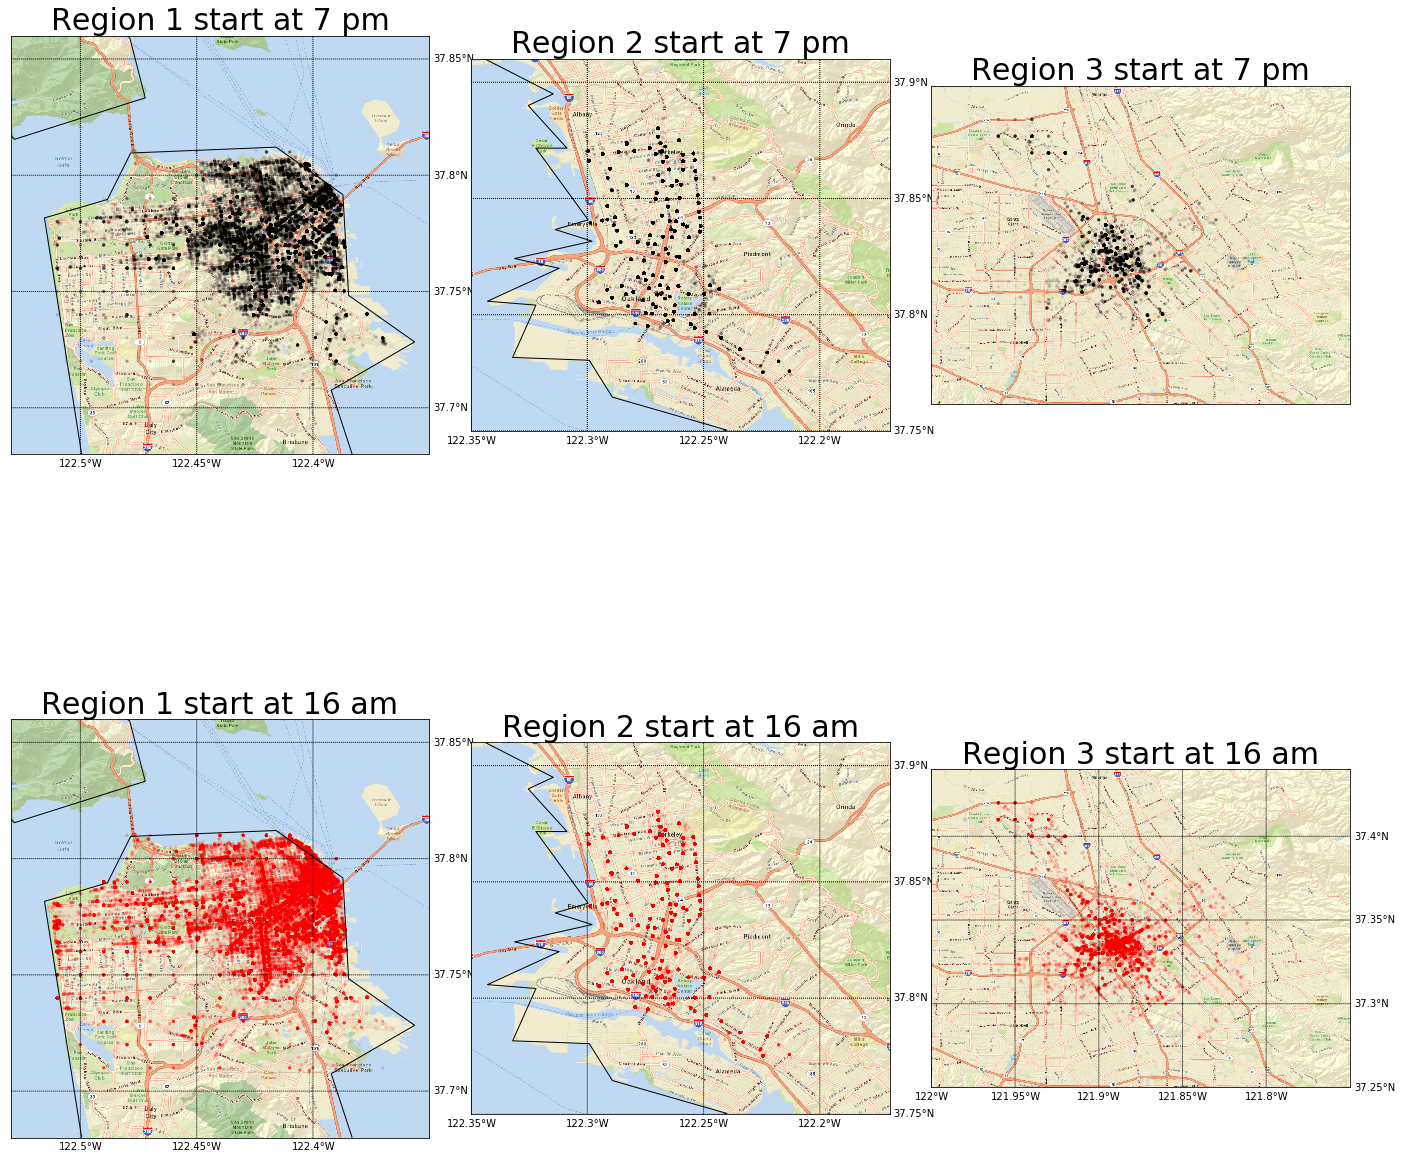

In [147]:
#N= df_final.shape[0]

#http://qingkaikong.blogspot.com/2016/06/nice-python-basemap-background.html
my_dpi = 200
map = Basemap(llcrnrlon=-122.53, llcrnrlat=37.68, 
              urcrnrlon=-122.35, urcrnrlat=37.86,resolution='i')


fig = plt.figure(figsize=(24,24))
gs = GridSpec(nrows=2, ncols=3)
gs.update(wspace=0.1, hspace=0.1)
############################################################################  1

ax0 = fig.add_subplot(gs[0, 0])
map.drawcountries(linewidth=0.5, linestyle='solid', color='black', antialiased=1, ax=None, zorder=1)
map.drawcoastlines()
map.shadedrelief()
#map.etopo()

#map.arcgisimage(service='World_Topo_Map', xpixels = 1500, verbose= True)
map.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 1200, verbose= True)
lon = df_final[df_final.start_hour == 7].start_station_longitude
lat = df_final[df_final.start_hour == 7].start_station_latitude


xpt,ypt = map(lon,lat)

cs = plt.scatter(xpt,ypt,edgecolors='none',s=10,
                 c= 'black', alpha=.1)



parallels = np.arange(0.,81,.05)

map.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,.05)
map.drawmeridians(meridians,labels=[True,False,False,True])
plt.title("Region 1 start at 7 pm", fontsize=30)
plt.tight_layout()
############################################################################## 2
map = Basemap(llcrnrlon=-122.35, llcrnrlat=37.75, 
              urcrnrlon=-122.17,  urcrnrlat=37.91,resolution='i')
ax0 = fig.add_subplot(gs[0, 1])
map.drawcountries(linewidth=0.5, linestyle='solid', color='black', antialiased=1, ax=None, zorder=1)
map.drawcoastlines()
map.shadedrelief()
#map.etopo()

#map.arcgisimage(service='World_Topo_Map', xpixels = 1500, verbose= True)
map.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 1200, verbose= True)
lon = df_final[df_final.start_hour == 7].start_station_longitude
lat = df_final[df_final.start_hour == 7].start_station_latitude


xpt,ypt = map(lon,lat)

cs = plt.scatter(xpt,ypt,edgecolors='none',s=10,
                 c= 'black', alpha=.1)


parallels = np.arange(0.,81,.05)

map.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,.05)
map.drawmeridians(meridians,labels=[True,False,False,True])
plt.title("Region 2 start at 7 pm", fontsize=30)
plt.tight_layout()
############################################################################## 3
ax0 = fig.add_subplot(gs[0, 2])
#--------------------------------------------------------------
map = Basemap(llcrnrlon=-122.0, llcrnrlat=37.25, 
              urcrnrlon=-121.75,  urcrnrlat=37.44,resolution='i')

map.drawcountries(linewidth=0.5, linestyle='solid', color='black', antialiased=1, ax=None, zorder=1)
map.drawcoastlines()
map.shadedrelief()
#map.etopo()
#map.arcgisimage(service='World_Topo_Map', xpixels = 1500, verbose= True)
map.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 1200, verbose= True)
lon = df_final[df_final.start_hour == 7].start_station_longitude
lat = df_final[df_final.start_hour == 7].start_station_latitude


xpt,ypt = map(lon,lat)

cs = plt.scatter(xpt,ypt,edgecolors='none',s=10,
                 c= 'black', alpha=.1)


parallels = np.arange(0.,81,.05)


plt.title("Region 3 start at 7 pm", fontsize=30)
plt.tight_layout()
######################
map = Basemap(llcrnrlon=-122.53, llcrnrlat=37.68, 
              urcrnrlon=-122.35, urcrnrlat=37.86,resolution='i')

ax0 = fig.add_subplot(gs[1, 0])
map.drawcountries(linewidth=0.5, linestyle='solid', color='black', antialiased=1, ax=None, zorder=1)
map.drawcoastlines()
map.shadedrelief()
#map.etopo()

#map.arcgisimage(service='World_Topo_Map', xpixels = 1500, verbose= True)
map.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 1200, verbose= True)

lon = df_final[df_final.start_hour == 16].start_station_longitude
lat = df_final[df_final.start_hour == 16].start_station_latitude


xpt,ypt = map(lon,lat)

cs = plt.scatter(xpt,ypt,edgecolors='none',s=10,
                 c= 'red', alpha=.1)


parallels = np.arange(0.,81,.05)

map.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,.05)
map.drawmeridians(meridians,labels=[True,False,False,True])
plt.title("Region 1 start at 16 am", fontsize=30)
plt.tight_layout()
############################################################################## 2
map = Basemap(llcrnrlon=-122.35, llcrnrlat=37.75, 
              urcrnrlon=-122.17,  urcrnrlat=37.91,resolution='i')
ax0 = fig.add_subplot(gs[1, 1])
map.drawcountries(linewidth=0.5, linestyle='solid', color='black', antialiased=1, ax=None, zorder=1)
map.drawcoastlines()
map.shadedrelief()
#map.etopo()

#map.arcgisimage(service='World_Topo_Map', xpixels = 1500, verbose= True)

map.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 1200, verbose= True)

lon = df_final[df_final.start_hour == 16].start_station_longitude
lat = df_final[df_final.start_hour == 16].start_station_latitude


xpt,ypt = map(lon,lat)

cs = plt.scatter(xpt,ypt,edgecolors='none',s=10,
                 c= 'red', alpha=.1)
parallels = np.arange(0.,81,.05)

map.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,.05)
map.drawmeridians(meridians,labels=[True,False,False,True])
plt.title("Region 2 start at 16 am", fontsize=30)
plt.tight_layout()
############################################################################## 3
ax0 = fig.add_subplot(gs[1, 2])
#--------------------------------------------------------------
map = Basemap(llcrnrlon=-122.0, llcrnrlat=37.25, 
              urcrnrlon=-121.75,  urcrnrlat=37.44,resolution='i')

map.drawcountries(linewidth=0.5, linestyle='solid', color='black', antialiased=1, ax=None, zorder=1)
map.drawcoastlines()
map.shadedrelief()
#map.etopo()
#map.arcgisimage(service='World_Topo_Map', xpixels = 1500, verbose= True)
map.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 1200, verbose= True)


lon = df_final[df_final.start_hour == 16].start_station_longitude
lat = df_final[df_final.start_hour == 16].start_station_latitude


xpt,ypt = map(lon,lat)

cs = plt.scatter(xpt,ypt,edgecolors='none',s=10,
                 c= 'red', alpha=.1)
parallels = np.arange(0.,81,.05)

map.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,.05)
map.drawmeridians(meridians,labels=[True,False,False,True])
plt.title("Region 3 start at 16 am", fontsize=30)
plt.tight_layout()



plt.savefig('Start_End_points_movements.png', format='png');

**Interesting that there is a moving pattern. but it is more abvious in the region 1. And I will focus with zooming on this region:**

> in the above figure black points are the start locations at 7 am and red points the start locations at 4 am. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=-122.43000000000002,37.77,-122.38,37.8&bboxSR=4326&imageSR=4326&size=1200,719&dpi=96&format=png32&transparent=true&f=image


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=-122.43000000000002,37.77,-122.38,37.8&bboxSR=4326&imageSR=4326&size=1200,719&dpi=96&format=png32&transparent=true&f=image


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


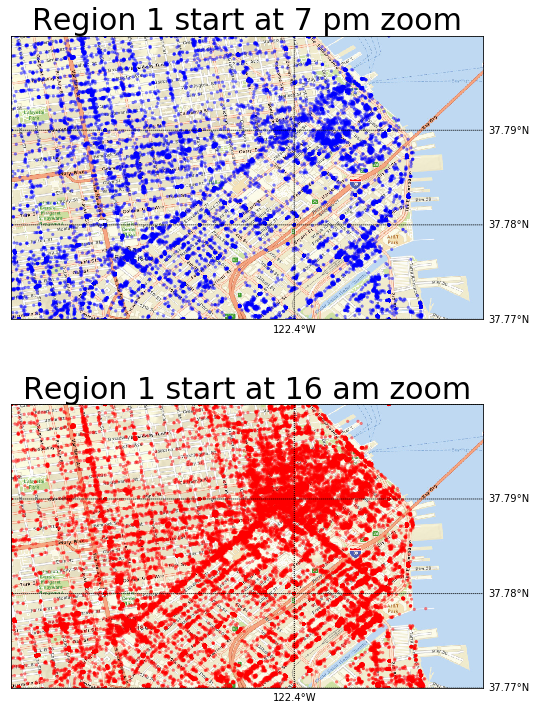

In [64]:
my_dpi = 200
map = Basemap(llcrnrlon=-122.43, llcrnrlat=37.77, 
              urcrnrlon=-122.38, urcrnrlat=37.8,resolution='f')



fig = plt.figure(figsize=(24,12))
gs = GridSpec(nrows=2, ncols=1)
gs.update(wspace=0.1, hspace=0.3)
############################################################################  1

ax0 = fig.add_subplot(gs[0, 0])


map.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 1200, verbose= True)
lon = df_final[df_final.start_hour == 7].start_station_longitude
lat = df_final[df_final.start_hour == 7].start_station_latitude


xpt,ypt = map(lon,lat)

cs = plt.scatter(xpt,ypt,edgecolors='none',s=10,
                 c= 'blue', alpha=.5)



parallels = np.arange(0.,81,.01)

map.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,.05)
map.drawmeridians(meridians,labels=[True,False,False,True])
plt.title("Region 1 start at 7 pm zoom", fontsize=30)
plt.tight_layout()









ax0 = fig.add_subplot(gs[1, 0])



map.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 1200, verbose= True)
lon = df_final[df_final.start_hour == 16].start_station_longitude
lat = df_final[df_final.start_hour == 16].start_station_latitude


xpt,ypt = map(lon,lat)

cs = plt.scatter(xpt,ypt,edgecolors='none',s=10,
                 c= 'red', alpha=.5)


parallels = np.arange(0.,81,.01)

map.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,.05)
map.drawmeridians(meridians,labels=[True,False,False,True])
plt.title("Region 1 start at 16 am zoom", fontsize=30)
plt.tight_layout()
plt.savefig('Start_End_points_movements_zoom.png', format='png');

### make a movie for different hours for the zoom region : 


In [70]:
map = Basemap(llcrnrlon=-122.43, llcrnrlat=37.77, 
              urcrnrlon=-122.38, urcrnrlat=37.8,resolution='f')



for hour in range(0,24):
    print('plotting '+str(hour))
    fig = plt.figure(figsize=(12,12))
    
    ############################################################################  1
    
    
    
    
    map.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 1200, verbose= True)
    lon = df_final[df_final.start_hour == hour].start_station_longitude
    lat = df_final[df_final.start_hour == hour].start_station_latitude
    
    
    xpt,ypt = map(lon,lat)
    
    cs = plt.scatter(xpt,ypt,edgecolors='none',s=10,
                     c= 'blue', alpha=.5)
    
    
    
    parallels = np.arange(0.,81,.01)
    
    map.drawparallels(parallels,labels=[False,True,True,False])
    meridians = np.arange(10.,351.,.05)
    map.drawmeridians(meridians,labels=[True,False,False,True])
    plt.title("Region 1 start at "+str(hour)+" pm zoom", fontsize=30)
    plt.tight_layout()
    if hour < 10:
        plt.savefig("Start_points_at_0"+str(hour)+"_zoom.png", format='png');
    else:
        plt.savefig("Start_points_at_"+str(hour)+"_zoom.png", format='png');        
    plt.close()
    




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


plotting 0
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=-122.43000000000002,37.77,-122.38,37.8&bboxSR=4326&imageSR=4326&size=1200,719&dpi=96&format=png32&transparent=true&f=image
plotting 1
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=-122.43000000000002,37.77,-122.38,37.8&bboxSR=4326&imageSR=4326&size=1200,719&dpi=96&format=png32&transparent=true&f=image
plotting 2
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=-122.43000000000002,37.77,-122.38,37.8&bboxSR=4326&imageSR=4326&size=1200,719&dpi=96&format=png32&transparent=true&f=image
plotting 3
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=-122.43000000000002,37.77,-122.38,37.8&bboxSR=4326&imageSR=4326&size=1200,719&dpi=96&format=png32&transparent=true&f=image
plotting 4
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Stre

In [77]:
import imageio
with imageio.get_writer('./movie.gif', mode='I', duration=1) as writer:
    for filename in sorted(glob.glob("./Start_points_at_*_zoom.png")):
        image = imageio.imread(filename)
        writer.append_data(image)

In [88]:
from IPython.display import HTML
HTML('<h1> The start locations with time <img src="./movie.gif">')


> **You see how people are using the bikes to commute to work and go back home** 

### 2020_04 vs 2019_04: How the COVID-19 Pandemie affected the bike usage in region 1?


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=-122.43000000000002,37.77,-122.38,37.8&bboxSR=4326&imageSR=4326&size=1200,719&dpi=96&format=png32&transparent=true&f=image


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=-122.43000000000002,37.77,-122.38,37.8&bboxSR=4326&imageSR=4326&size=1200,719&dpi=96&format=png32&transparent=true&f=image


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


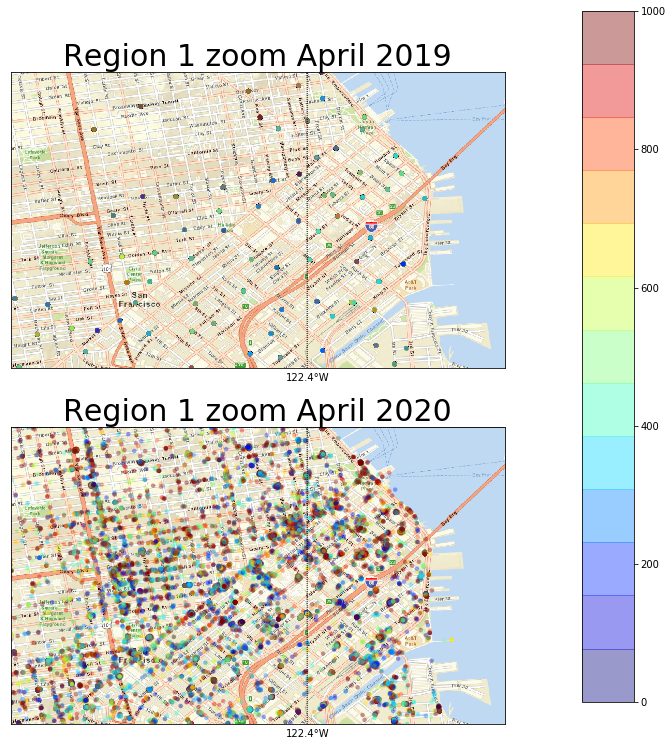

In [105]:
#http://qingkaikong.blogspot.com/2016/06/nice-python-basemap-background.html

map = Basemap(llcrnrlon=-122.43, llcrnrlat=37.77, 
              urcrnrlon=-122.38, urcrnrlat=37.8,resolution='f')


fig = plt.figure(figsize=(24,12))
gs = GridSpec(nrows=2, ncols=1)
gs.update(wspace=0.1, hspace=0.2)
############################################################################  1

ax0 = fig.add_subplot(gs[0, 0])
#map.drawcountries(linewidth=0.5, linestyle='solid', color='black', antialiased=1, ax=None, zorder=1)
#map.drawcoastlines()
#map.shadedrelief()
#map.etopo()
cmap = plt.cm.get_cmap("jet", 13)
#map.arcgisimage(service='World_Topo_Map', xpixels = 1500, verbose= True)
map.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 1200, verbose= True)
lon = df_final[(df_final.start_year==2019) & (df_final.start_month==4) ].start_station_longitude
lat = df_final[(df_final.start_year==2019) & (df_final.start_month==4) ].start_station_latitude

xpt,ypt = map(lon,lat)
value = df_final[(df_final.start_year==2019) & (df_final.start_month==4) ].duration_sec
cs = plt.scatter(xpt,ypt,edgecolors='none', vmin=0, vmax=1000,cmap=cmap,s=20,
                 c= value, alpha=.4)

parallels = np.arange(0.,81,.05)

map.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,.05)
map.drawmeridians(meridians,labels=[True,False,False,True])
plt.title("Region 1 zoom April 2019", fontsize=30)
plt.tight_layout()


## 2020 : 

ax0 = fig.add_subplot(gs[1, 0])
#map.drawcountries(linewidth=0.5, linestyle='solid', color='black', antialiased=1, ax=None, zorder=1)
#map.drawcoastlines()
#map.shadedrelief()
#map.etopo()
cmap = plt.cm.get_cmap("jet", 13)
#map.arcgisimage(service='World_Topo_Map', xpixels = 1500, verbose= True)
map.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 1200, verbose= True)
lon = df_final[(df_final.start_year==2020) & (df_final.start_month==4) ].start_station_longitude
lat = df_final[(df_final.start_year==2020) & (df_final.start_month==4) ].start_station_latitude

xpt,ypt = map(lon,lat)
value = df_final[(df_final.start_year==2020) & (df_final.start_month==4) ].duration_sec
cs = plt.scatter(xpt,ypt,edgecolors='none', vmin=0, vmax=1000,cmap=cmap,s=20,
                 c= value, alpha=.4)

parallels = np.arange(0.,81,.05)

map.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,.05)
map.drawmeridians(meridians,labels=[True,False,False,True])
plt.title("Region 1 zoom April 2020", fontsize=30)
plt.tight_layout()
cbar_ax = fig.add_axes([0.7, 0.15, 0.03, 0.8])
fig.colorbar(cs, cax=cbar_ax)

plt.savefig('2020_04_vs_2019_04_zoom.png', format='png');

**This is really important which shows that there existed a boom in bikesharing in 2020 during the pandemie!!!!**
> I will plot the differences in bike rides on the map for each year from January to june between 2019 and 2020 : 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=-122.43000000000002,37.77,-122.38,37.8&bboxSR=4326&imageSR=4326&size=1200,719&dpi=96&format=png32&transparent=true&f=image
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=-122.43000000000002,37.77,-122.38,37.8&bboxSR=4326&imageSR=4326&size=1200,719&dpi=96&format=png32&transparent=true&f=image
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=-122.43000000000002,37.77,-122.38,37.8&bboxSR=4326&imageSR=4326&size=1200,719&dpi=96&format=png32&transparent=true&f=image
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=-122.43000000000002,37.77,-122.38,37.8&bboxSR=4326&imageSR=4326&size=1200,719&dpi=96&format=png32&transparent=true&f=image
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=-122.4300000000000

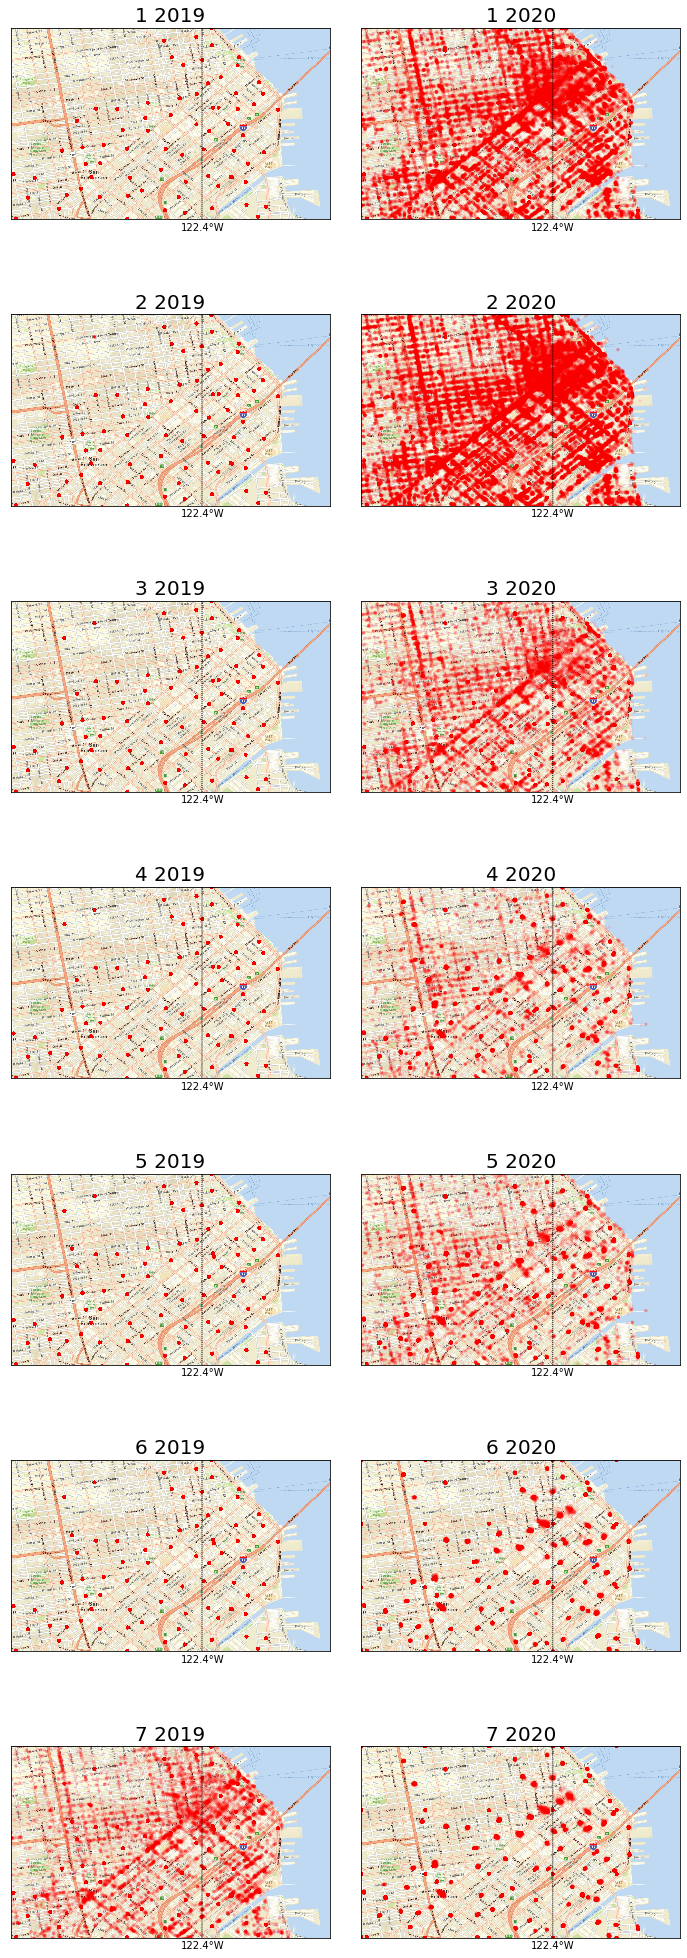

In [46]:
map = Basemap(llcrnrlon=-122.43, llcrnrlat=37.77, 
              urcrnrlon=-122.38, urcrnrlat=37.8,resolution='f')


fig = plt.figure(figsize=(12,36))
gs = GridSpec(nrows=7, ncols=2)
gs.update(wspace=0.1, hspace=0.2)
############################################################################  1



def plot_month(year,month, column, row):
    
    
    ax0 = fig.add_subplot(gs[row, column])

    cmap = plt.cm.get_cmap("jet", 13)

    map.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 1200, verbose= True)
    lon = df_final[(df_final.start_year==year) & (df_final.start_month==month) ].start_station_longitude
    lat = df_final[(df_final.start_year==year) & (df_final.start_month==month) ].start_station_latitude
    
    xpt,ypt = map(lon,lat)
    #value = df_final[(df_final.start_year==year) & (df_final.start_month==month) ].duration_sec
    #cs = plt.scatter(xpt,ypt,edgecolors='none', vmin=0, vmax=1000,cmap=cmap,s=20,
    #                 c= value, alpha=.3)
    cs = plt.scatter(xpt,ypt,edgecolors='none',s=10,
                 c= 'red', alpha=.1)
    parallels = np.arange(0.,81,.05)
    
    map.drawparallels(parallels,labels=[False,True,True,False])
    meridians = np.arange(10.,351.,.05)
    map.drawmeridians(meridians,labels=[True,False,False,True])
    plt.title(str(month)+" "+str(year), fontsize=20)
    #plt.tight_layout()
    #fig.colorbar(cs, cax=cbar_ax)
    
# now plot the matrix : 

plot_month(2019,1, 0, 0)
plot_month(2020,1, 1, 0)

plot_month(2019,2, 0, 1)
plot_month(2020,2, 1, 1)
plot_month(2019,3, 0, 2)
plot_month(2020,3, 1, 2)
plot_month(2019,4, 0, 3)
plot_month(2020,4, 1, 3)
plot_month(2019,5, 0, 4)
plot_month(2020,5, 1, 4)
plot_month(2019,6, 0, 5)
plot_month(2020,6, 1, 5)
plot_month(2019,7, 0, 6)
plot_month(2020,7, 1, 6)
#fig.title('2020 vs 2019',fontsize=20)
plt.savefig('2020_vs_2019.png', format='png');

**Now just look at the number of new daily COVID-19 cases in san Fransisco**
- What is interesting is that in 2020 during June and July the bike ride is reducing and at the same time the COVID-19 cases are increasing! 
- Shall people use bikes instead of public transportaions? or are they staying at home? or driving cars? 


In [47]:
%%html
<iframe src="https://app.powerbigov.us/view?r=eyJrIjoiYTkwY2Y5NzUtOWQ0MC00ZDljLTk0M2YtNTBkNGExYjkwYjY0IiwidCI6IjIyZDVjMmNmLWNlM2UtNDQzZC05YTdmLWRmY2MwMjMxZjczZiJ9&amp;navContentPaneEnabled=false&amp;filterPaneEnabled=false" width="1000" height="1000"></iframe>

Text(0.5, 1.0, 'Number of rides  per month (sec)')

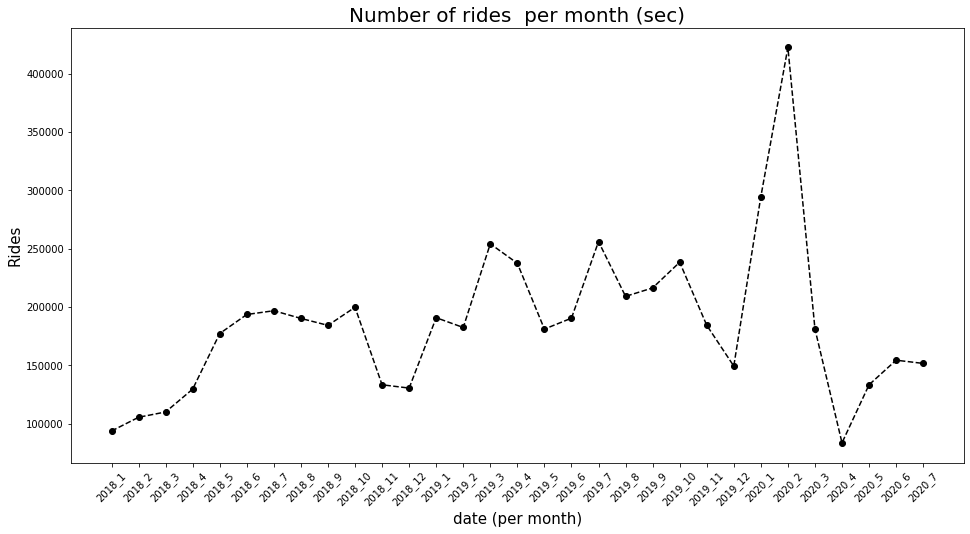

In [129]:
mon = 0
index = []
val = np.zeros(31)
for year in range(2018,2021):
    for month in range(1,13): 
        if (year == 2020) & (month> 7):
            break 
        
        val[mon]=len(df_final[(df_final.start_month==month) & (df_final.start_year==year)].duration_sec)
        index.append(str(year)+"_"+str(month))
        mon += 1
fig, ax = plt.subplots(figsize=(16,8))

plt.plot(range(31),val,'k--o'); 
ax.set_xticks(range(31))
ax.set_xticklabels(index, rotation = 45);
plt.xlabel("date (per month)",fontsize=15)
plt.ylabel("Rides", fontsize=15)
plt.title("Number of rides  per month (sec)", fontsize=20)

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [124]:
len(df_final[(df_final.start_month==month) & (df_final.start_year==year)].duration_sec)

93589

### In my city Berlin, these days, there are very few tourists on the streets. I imagine it would be the case in San Fransisco. 
> I imagine the tourists are renting bikes for a duration more than 1 hour(3600 seconds). So if there are less 3600 duration cases after the Pandemie, then I conclude there might  be less tourists around. So I will chjeck that below: 

Text(0.5, 1.0, 'Number of rides  per month (sec) for durations > 3600 sec.')

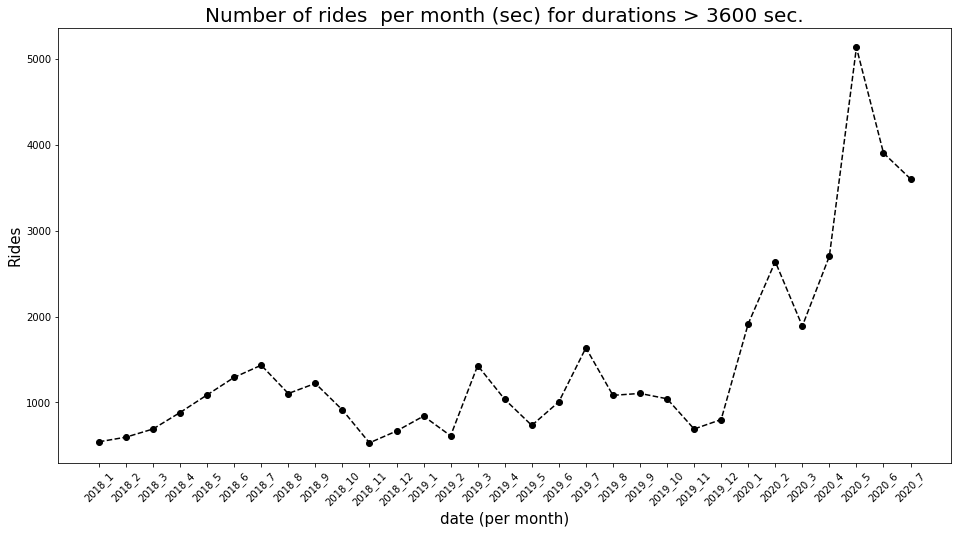

In [137]:
mon = 0
index = []
val = np.zeros(31)
for year in range(2018,2021):
    for month in range(1,13): 
        if (year == 2020) & (month> 7):
            break 
        
        val[mon]=len(df_final[(df_final.start_month==month) & (df_final.start_year==year) & (df_final.duration_sec >= 3600)].duration_sec)
        index.append(str(year)+"_"+str(month))
        mon += 1
fig, ax = plt.subplots(figsize=(16,8))

plt.plot(range(31),val,'k--o'); 
ax.set_xticks(range(31))
ax.set_xticklabels(index, rotation = 45);
plt.xlabel("date (per month)",fontsize=15)
plt.ylabel("Rides", fontsize=15)
plt.title("Number of rides  per month (sec) for durations > 3600 sec.", fontsize=20)

**Well I could not proof my hypothesis and the duration has somthing with 2020** 
> maybe more bike available at the streets or more related to the pandemie. No I will check if the median of the duration in seconds for durations greater than 3600 (tourists) also shows some trends? 

Text(0.5, 1.0, 'Median of durations per month (sec) for durations > 3600 sec.')

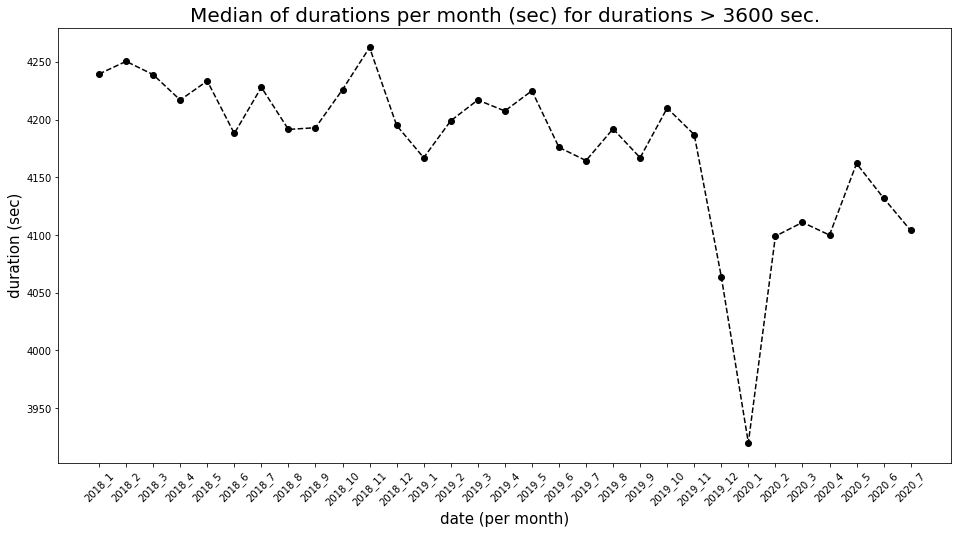

In [144]:
mon = 0
index = []
val = np.zeros(31)
for year in range(2018,2021):
    for month in range(1,13): 
        if (year == 2020) & (month> 7):
            break 
        
        val[mon]=np.median(df_final[(df_final.start_month==month) & (df_final.start_year==year) & (df_final.duration_sec >= 3600)].duration_sec)
        index.append(str(year)+"_"+str(month))
        mon += 1
fig, ax = plt.subplots(figsize=(16,8))

plt.plot(range(31),val,'k--o'); 
ax.set_xticks(range(31))
ax.set_xticklabels(index, rotation = 45);
plt.xlabel("date (per month)",fontsize=15)
plt.ylabel("duration (sec)", fontsize=15)
plt.title("Median of durations per month (sec) for durations > 3600 sec.", fontsize=20)

#### Median of Monthly Durations for durations > 3600 sec

> Interesting that although the number of rentals with durations greater than 1 hour has increased but the median of the duratons in decreasing. Which shows people are using the rides to commute and not for sight-seeing and descovering the city. Look at this news: 

https://www.ktvu.com/news/empty-streets-of-san-francisco-report-says-tourism-takes-hardest-hit-since-wwii

According to them : **"The number of visitors is expected to be less than half of last year.**

In [36]:
# save the dataframe: 
df_final.to_pickle("data_final_for_vis.pkl")
